In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [21]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
emotion-detection-fer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
import zipfile
zip_ref = zipfile.ZipFile('/content/emotion-detection-fer.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# IMPORTING LIBRARIES

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np
import pandas as pd


C:\Users\91853\anaconda2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Initialize image data generator with rescaling

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all train images

In [5]:
train_generator = train_data_gen.flow_from_directory(
	"C:/Users/91853/Downloads/Training/train",
	target_size=(48, 48),
	batch_size=64,
	color_mode="grayscale",
	class_mode='categorical')


Found 28709 images belonging to 7 classes.


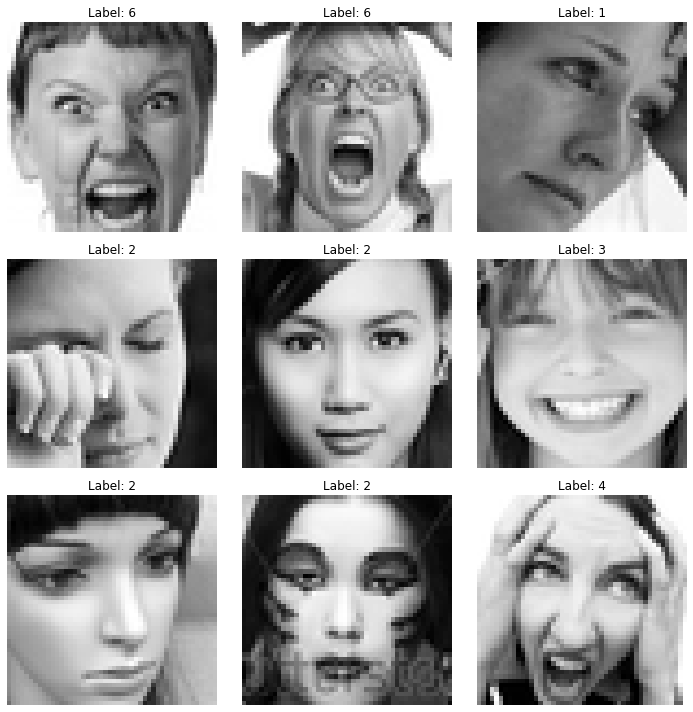

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fetch a batch of images and labels
images, labels = next(train_generator)

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(9):  # Change this number to plot more or fewer images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(48, 48), cmap='gray')  # Reshape to 2D for grayscale images
    plt.title(f'Label: {np.argmax(labels[i])}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
# Print the shapes of the images and labels
print(f"Shape of images batch: {images.shape}")
print(f"Shape of labels batch: {labels.shape}")

Shape of images batch: (64, 48, 48, 1)
Shape of labels batch: (64, 7)


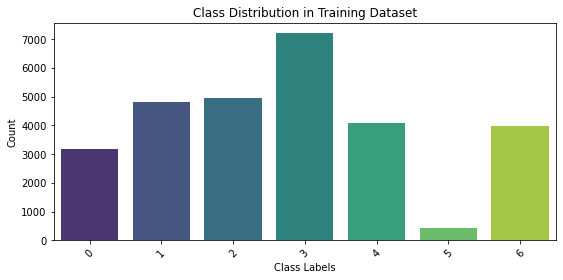

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Extract class indices and labels
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices
class_counts = {class_labels[k]: 0 for k in range(len(class_labels))}

# Calculate the count of each class
for c in train_generator.classes:
    class_counts[class_labels[c]] += 1

# Plot the distribution of classes
plt.figure(figsize=(9, 4))
sns.countplot(x=list(train_generator.classes), palette="viridis")
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution in Training Dataset')
plt.show()

In [9]:
validation_generator = validation_data_gen.flow_from_directory(
		"C:/Users/91853/Downloads/Training/test",
		target_size=(48, 48),
		batch_size=64,
		color_mode="grayscale",
		class_mode='categorical')


Found 7168 images belonging to 7 classes.


# Create CNN Model Structure

In [10]:

emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
						input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.summary()

cv2.ocl.setUseOpenCL(False)

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,
							decay_rate=0.96)

optimizer = Adam(learning_rate=lr_schedule)

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,
					metrics=['accuracy'])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

# Train The Neural Network Model

In [11]:
emotion_model_info = emotion_model.fit_generator(
		train_generator,
		steps_per_epoch=28709 // 64,
		epochs=30,
		validation_data=validation_generator,
		validation_steps=7178 // 64)


Epoch 1/30


C:\Users\91853\AppData\Local\Temp\ipykernel_18324\770053614.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(




448/448 [==============================] - 121s 268ms/step - loss: 1.7956 - accuracy: 0.2651 - val_loss: 2.1562 - val_accuracy: 0.2253
Epoch 2/30
448/448 [==============================] - 117s 262ms/step - loss: 1.6202 - accuracy: 0.3709 - val_loss: 2.2593 - val_accuracy: 0.2302
Epoch 3/30
448/448 [==============================] - 115s 256ms/step - loss: 1.5140 - accuracy: 0.4188 - val_loss: 2.2859 - val_accuracy: 0.2373
Epoch 4/30
448/448 [==============================] - 112s 250ms/step - loss: 1.4384 - accuracy: 0.4520 - val_loss: 2.3897 - val_accuracy: 0.2365
Epoch 5/30
448/448 [==============================] - 118s 264ms/step - loss: 1.3791 - accuracy: 0.4778 - val_loss: 2.4772 - val_accuracy: 0.2514
Epoch 6/30
448/448 [==============================] - 119s 266ms/step - loss: 1.3264 - accuracy: 0.4981 - val_loss: 2.4909 - val_accuracy: 0.2507
Epoch 7/30
448/448 [==============================] - 119s 266ms/step - loss: 1.2836 - accuracy: 0.5138 - val_loss: 2.6029 - val_accu

# Accuracy and Loss Evaluation

In [12]:
emotion_model.evaluate(validation_generator)


112/112 [==============================] - 5s 48ms/step - loss: 3.8176 - accuracy: 0.2457


[3.817587375640869, 0.2456752210855484]

# Visualizing Accuracy and Loss

In [13]:
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']


# Subplot for Accuracy and loss Graph:

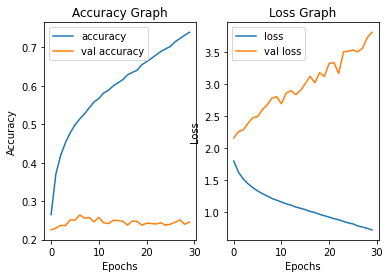

In [14]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# lets check working of the model on images

Model loaded successfully.
1/1 [==============================] - 0s 274ms/step
Predicted emotion: Happy (Score: 0.46)


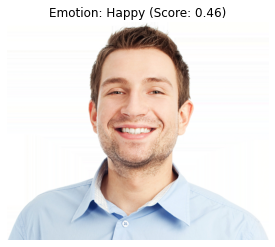

In [73]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import matplotlib.pyplot as plt

# Define the emotion labels (update this according to your model's labels)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Function to load the model
def load_emotion_model(model_path, saved_model_format=False):
    if saved_model_format:
        # Load TensorFlow SavedModel format
        model = tf.keras.models.load_model(model_path)
    else:
        # Load Keras .h5 model file
        model = load_model(model_path)
    return model

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    image = Image.open(image_path)
    # Convert the image to grayscale
    gray_image = image.convert('L')
    # Resize the image to the input size of the model (e.g., 48x48 for FER2013 dataset)
    resized_image = gray_image.resize((48, 48))
    # Convert the image to an array
    image_array = img_to_array(resized_image)
    # Normalize the pixel values to the range [0, 1]
    image_array = image_array / 255.0
    # Expand dimensions to match the input shape of the model
    image_array = np.expand_dims(image_array, axis=0)
    image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension if needed
    return image_array

# Function to predict emotion from the image
def predict_emotion(model, image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    # Predict the emotion
    predictions = model.predict(preprocessed_image)
    # Get the emotion label with the highest probability
    emotion_index = np.argmax(predictions)
    emotion_label = emotion_labels[emotion_index]
    emotion_score = predictions[0][emotion_index]
    return emotion_label, emotion_score

# Function to display the image with the predicted emotion
def display_image_with_emotion(image_path, emotion_label, emotion_score):
    # Load and display the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(f'Emotion: {emotion_label} (Score: {emotion_score:.2f})')
    plt.axis('off')
    plt.show()

# Path to the image file and model file
image_path = "C:/Users/91853/Downloads/Smile-Face-Transparent-PNG.png"
model_path = "C:/Users/91853/Downloads/Training/model.h5"

# Load the model
try:
    model = load_emotion_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Predict the emotion
try:
    emotion_label, emotion_score = predict_emotion(model, image_path)
    print(f"Predicted emotion: {emotion_label} (Score: {emotion_score:.2f})")
    display_image_with_emotion(image_path, emotion_label, emotion_score)
except Exception as e:
    print(f"Error predicting emotion: {e}")
